In [2]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np


df = pd.read_csv('imdb_master.csv', encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values


#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:]) # defining input_dim

# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300, input_dim= input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) #change no. of neurons to three and activation function as softmax 
                                                 #for output layer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=False, validation_data=(X_test,y_test), batch_size=256)

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 2s 66us/step
Evaluation result on Test Data : Loss = 1.0812139752197265, accuracy = 0.5138400197029114


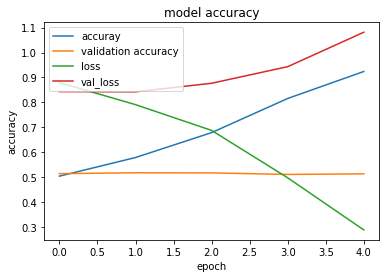

In [4]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [18]:
# Adding Embedding layer to the model 
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

sentences1 = df['review']

max_review_len= max([len(s.split()) for s in sentences1])
vocab_size= len(tokenizer.word_index)+1
sentences1 = tokenizer.texts_to_sequences(sentences1)
padded_docs= pad_sequences(sentences1,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model1 = Sequential()
model1.add(Embedding(vocab_size, 50, input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 404s 5ms/step - loss: 8.0482 - acc: 0.4982 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 2/5
75000/75000 [==============================] - 408s 5ms/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 3/5
75000/75000 [==============================] - 421s 6ms/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 4/5
75000/75000 [==============================] - 423s 6ms/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026
Epoch 5/5
75000/75000 [==============================] - 427s 6ms/step - loss: 8.0730 - acc: 0.4991 - val_loss: 8.0171 - val_acc: 0.5026


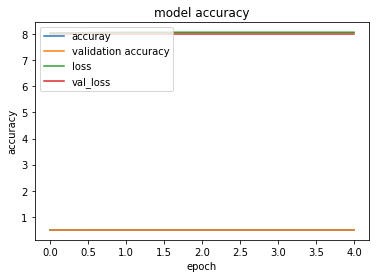

In [19]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [21]:
# Applying the same for 20news data 
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences2 = newsgroups_train.data
y = newsgroups_train.target

max_review_len= max([len(s.split()) for s in sentences2])
vocab_size= len(tokenizer.word_index)+1
sentences2 = tokenizer.texts_to_sequences(sentences2)
padded_docs= pad_sequences(sentences2,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(20, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history2=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 205s 24ms/step - loss: 13.4184 - acc: 0.0596 - val_loss: 13.5994 - val_acc: 0.0710
Epoch 2/5
8485/8485 [==============================] - 198s 23ms/step - loss: 5.0882 - acc: 0.0711 - val_loss: 3.7496 - val_acc: 0.0714
Epoch 3/5
8485/8485 [==============================] - 196s 23ms/step - loss: 3.4062 - acc: 0.1556 - val_loss: 3.4048 - val_acc: 0.1492
Epoch 4/5
8485/8485 [==============================] - 195s 23ms/step - loss: 2.9231 - acc: 0.3141 - val_loss: 2.7728 - val_acc: 0.1828
Epoch 5/5
8485/8485 [==============================] - 190s 22ms/step - loss: 2.0417 - acc: 0.4764 - val_loss: 2.2584 - val_acc: 0.3026


In [22]:
# predicting over the 4th sample data
print("Actual Value:",y_test[4],"Predicted Value",model2.predict_classes(X_test[[4],:]))

Actual Value: 4 Predicted Value [6]
